In [34]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [36]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [37]:
data['Tax_New']=pd.cut(data['Taxable.Income'],bins=[0,30000,99619+1],labels=['Risky','Good'])
data=data.drop(['Taxable.Income'],axis=1)

In [39]:
encoder=LabelEncoder()
data['Undergrad']=encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=encoder.fit_transform(data['Marital.Status'])
data['Urban']=encoder.fit_transform(data['Urban'])
data['Tax_New']=encoder.fit_transform(data['Tax_New'])

In [40]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_New
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [41]:
data1=data.drop(['City.Population'],axis=1)

In [43]:
x=data.drop(['Tax_New'],axis=1)

In [44]:
y=data[['Tax_New']]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [46]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [47]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

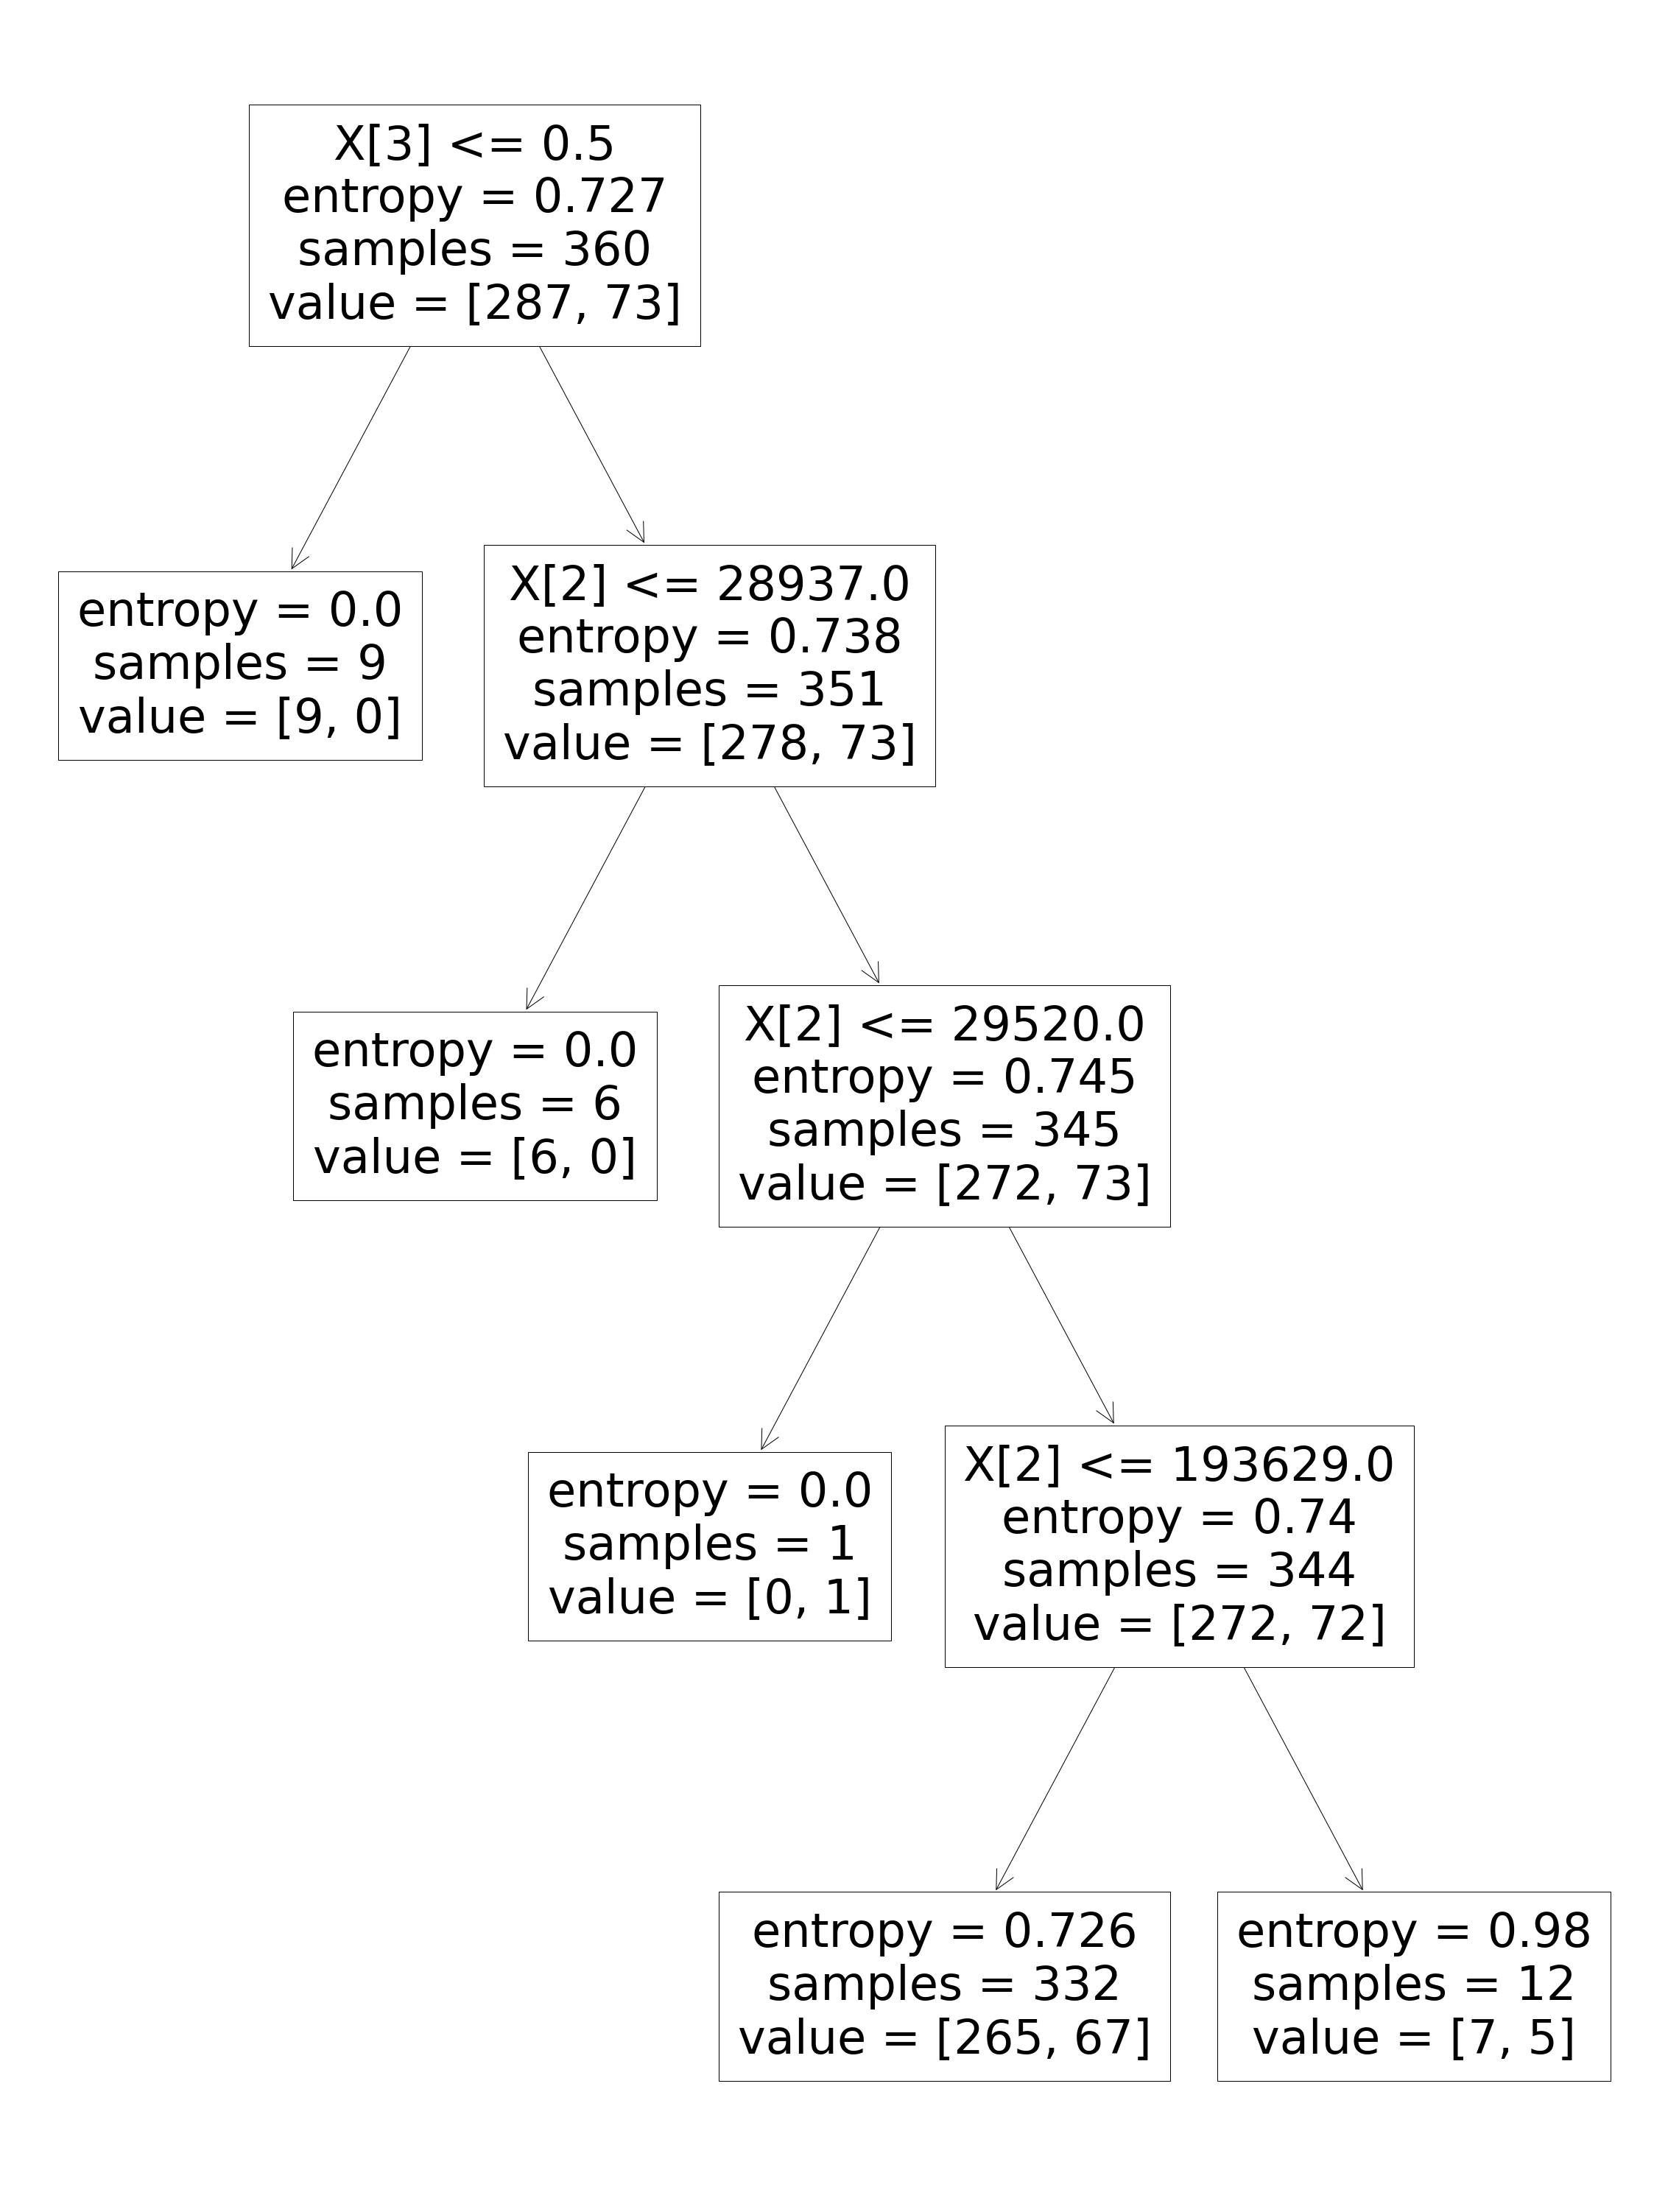

In [48]:
plt.figure(figsize=(40,55))
tree.plot_tree(model);

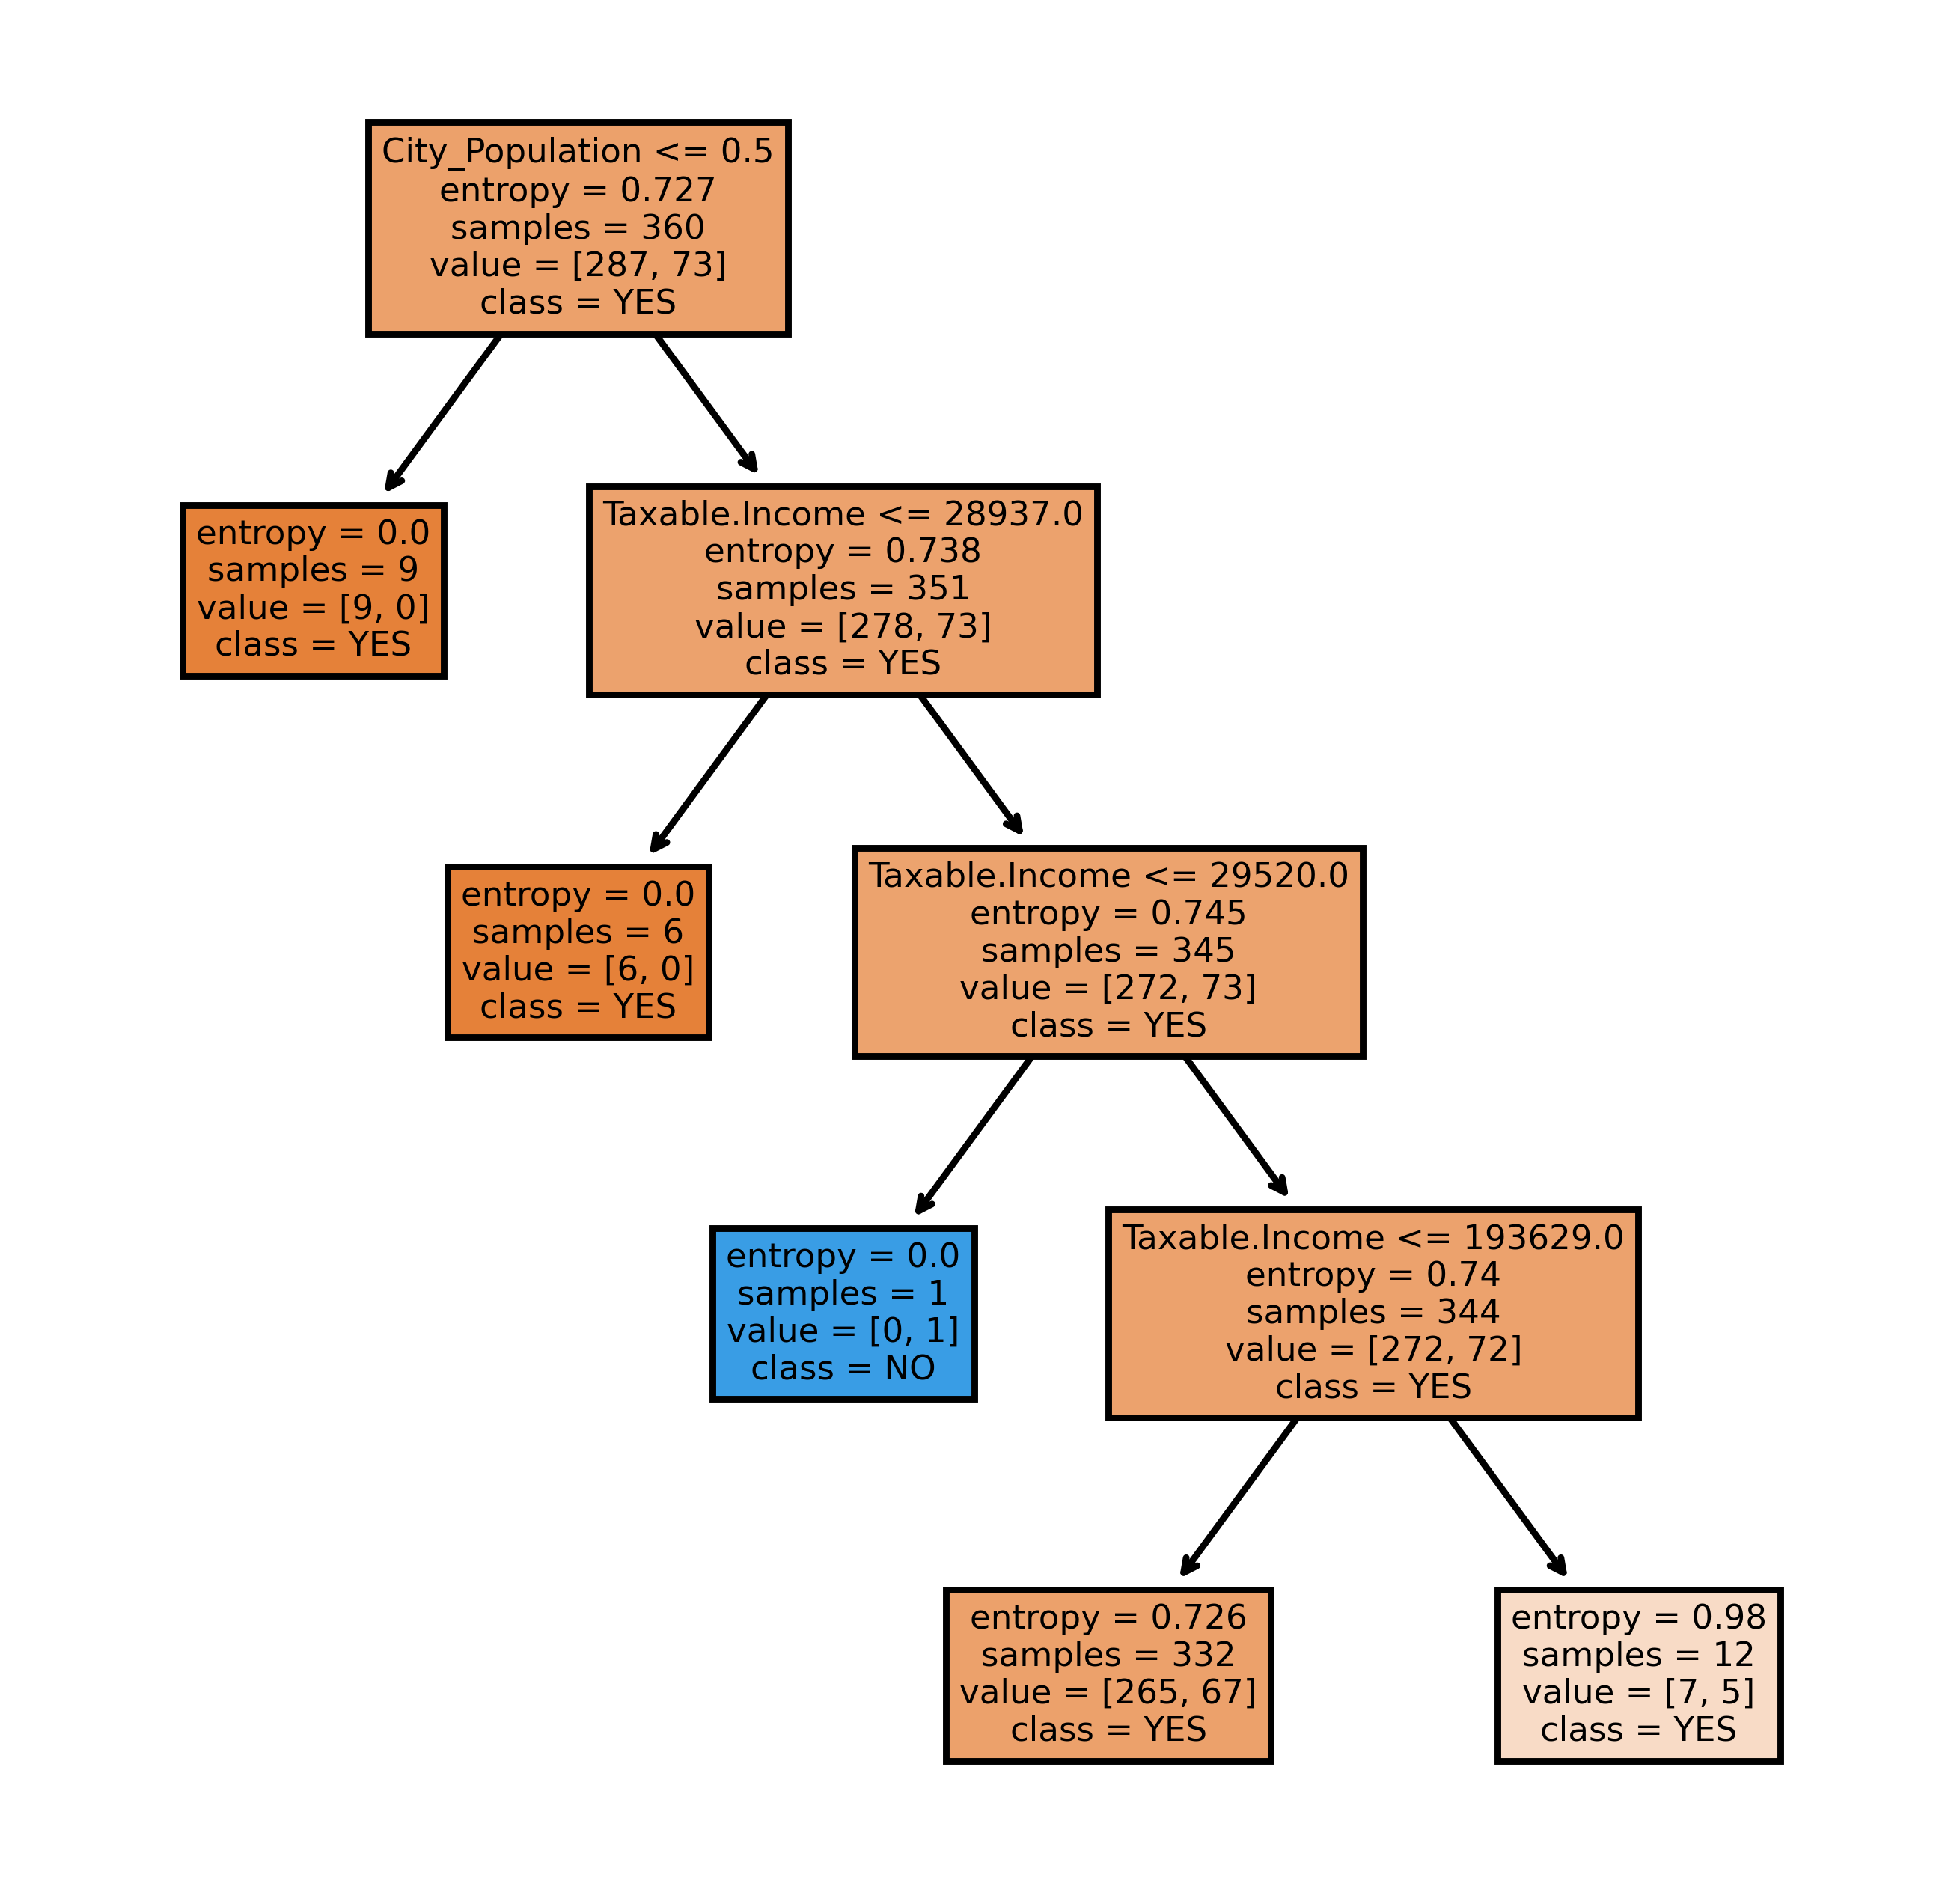

In [49]:
features=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City_Population', 'Work_Experience']
classes=['YES','NO']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=640)
tree.plot_tree(model, feature_names = features, class_names = classes, filled=True);

In [50]:
y_pred=model.predict(x_test)

In [51]:
pd.Series(y_pred).value_counts()

0    240
dtype: int64

In [52]:
model.score(x_train,y_train)

0.8

In [53]:
model.score(x_test,y_pred)

1.0

In [57]:
model.feature_importances_

array([0.        , 0.        , 0.67727035, 0.32272965, 0.        ])

# Q2:            company data


In [86]:
data1=pd.read_csv('Company_Data.csv')

data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [87]:
data1.duplicated().sum()

0

In [81]:
# label=LabelEncoder()
# data1['ShelveLoc']=label.fit_transform(data1['ShelveLoc'])
# data1['Urban']=label.fit_transform(data1['Urban'])
# data1['US']=label.fit_transform(data1['US'])

In [88]:
data1['Sales']= label.fit_transform(data1['Sales']) 
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,Bad,42,17,Yes,Yes
1,297,111,48,16,260,83,Good,65,10,Yes,Yes
2,267,113,35,10,269,80,Medium,59,12,Yes,Yes
3,158,117,100,4,466,97,Medium,55,14,Yes,Yes
4,37,141,64,3,340,128,Bad,38,13,Yes,No


In [89]:
data1['Sales_New']=pd.cut(data1.Sales,bins=[0,163,335],labels=['Low','High'])
data1.drop(['Sales'],axis=1,inplace=True)
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [90]:
data2=pd.get_dummies(data1)
data2

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low,Sales_New_High
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1,0


In [102]:
data2.drop(['Sales_New_High'],axis=1,inplace=True)

In [103]:
data2

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [104]:
x=data2.iloc[:,0:14]
y=data2['Sales_New_Low']

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)

In [106]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [107]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

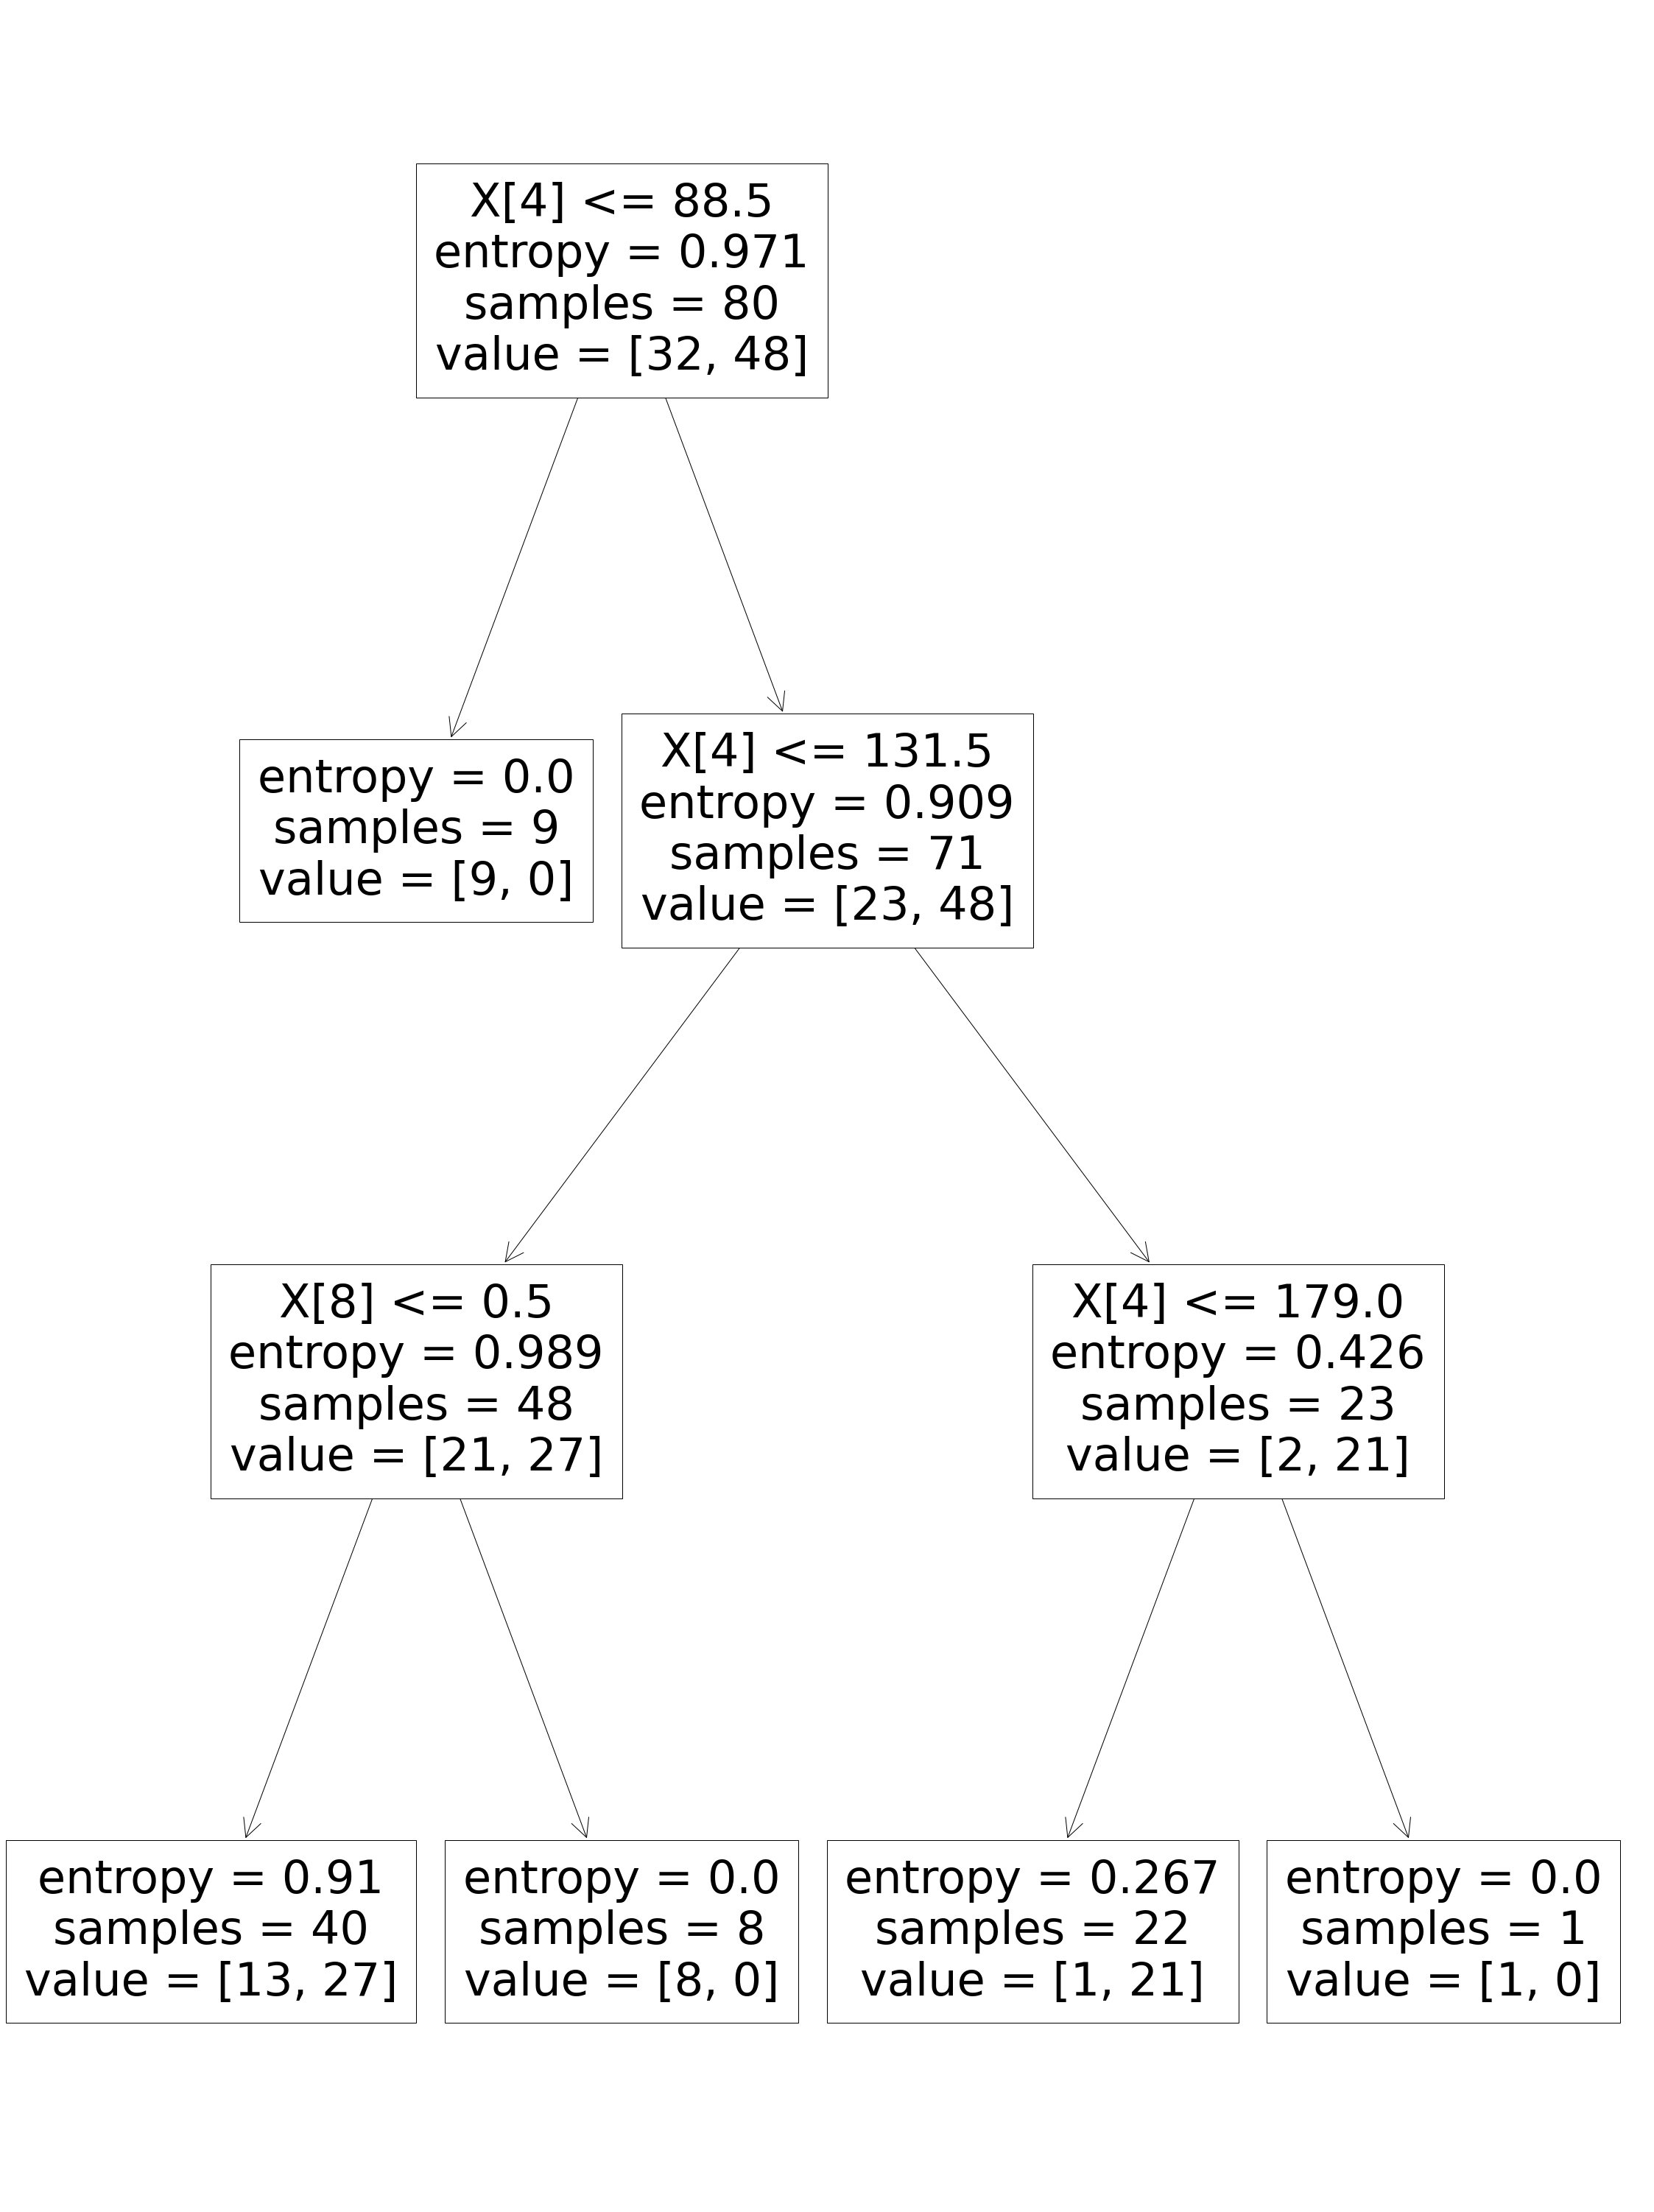

In [108]:
plt.figure(figsize=(40,55))
tree.plot_tree(model);

In [109]:
y_pred=model.predict(x_test)

In [110]:
accuracy_score(y_test,y_pred)

0.675

[Text(125.55000000000001, 190.26, 'X[4] <= 88.5\nentropy = 0.971\nsamples = 80\nvalue = [32, 48]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(167.4, 135.9, 'X[4] <= 131.5\nentropy = 0.909\nsamples = 71\nvalue = [23, 48]'),
 Text(83.7, 81.53999999999999, 'X[8] <= 0.5\nentropy = 0.989\nsamples = 48\nvalue = [21, 27]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.91\nsamples = 40\nvalue = [13, 27]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[4] <= 179.0\nentropy = 0.426\nsamples = 23\nvalue = [2, 21]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.267\nsamples = 22\nvalue = [1, 21]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

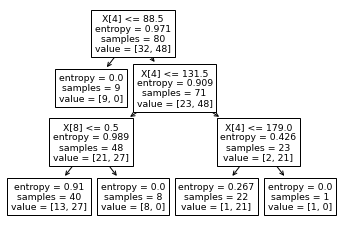

In [111]:
tree.plot_tree(model)